# Text classification with machine learning.

## Preprocessing steps:

Step 1. Loading the training and the validation sets of 20 Newsgroups:

In [2]:
from sklearn.datasets import fetch_20newsgroups

cats = ['sci.space', 'talk.politics.mideast', 'comp.graphics']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, remove=('headers', 'footers', 'quotes'), shuffle = False)
train_data = newsgroups_train.data
y_train = newsgroups_train.target

newsgroups_valid = fetch_20newsgroups(subset='test', categories=cats, remove=('headers', 'footers', 'quotes'), shuffle = False)
valid_data = newsgroups_valid.data
y_valid = newsgroups_valid.target

print("Training size %d" % len(train_data))
print("Training targets: %s" % newsgroups_train.target_names)

print("Validation size %d" % len(valid_data))
print("Validation targets: %s" % newsgroups_valid.target_names)


Training size 1741
Training targets: ['comp.graphics', 'sci.space', 'talk.politics.mideast']
Validation size 1159
Validation targets: ['comp.graphics', 'sci.space', 'talk.politics.mideast']


Step 2. Vectorizing the training set:

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(binary = False, min_df = 5)

X_train = count.fit_transform(train_data)
print(X_train.shape, y_train.shape)


(1157, 4900) (1157,)


Step 3. Transforming the testing set:

In [48]:
X_valid = count.transform(valid_data)

print(X_valid.shape, y_valid.shape)

(1159, 5899) (1159,)


## Training k-Nearest Neigbors (k-NN)

Step 1. Fitting the classifier:

In [50]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(3)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Step 2. Predicitng the validation set:

In [51]:
p_valid = KNN.predict(X_valid)
print(p_valid.shape)

(1159,)


Step3. Measuring the accuracy of the validation set:

In [52]:
from sklearn.metrics import accuracy_score

accuracy_score(y_valid, p_valid)

0.54788610871440901

Step 4. Tuning parameters and retest:

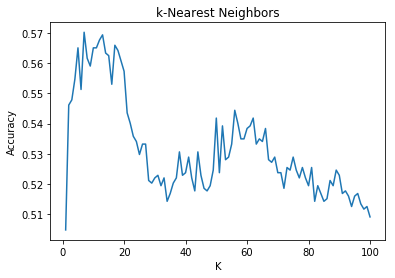

In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Accuracy = []

for k in range(1, 101):
    KNN = KNeighborsClassifier(k)
    KNN.fit(X_train, y_train)
    p_valid = KNN.predict(X_valid)
    Accuracy.append(accuracy_score(y_valid, p_valid))
    
plt.title("k-Nearest Neighbors")
plt.plot(range(1, 101), Accuracy)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

## Training Naive Bayes classifier

Using BernoulliNB with binary vectorization:

In [56]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count = CountVectorizer(binary = True, min_df = 5, stop_words = 'english')
X_train = count.fit_transform(train_data)
X_valid = count.transform(valid_data)

BNB = BernoulliNB(1e-10)
BNB.fit(X_train, y_train)
p_valid = BNB.predict(X_valid)
print(accuracy_score(y_valid, p_valid))



0.831751509922


Using MultinomialNB with count vectorization:

In [60]:
count = CountVectorizer(min_df = 1, stop_words = 'english')
X_train = count.fit_transform(train_data)
X_valid = count.transform(valid_data)

MNB = MultinomialNB(1e-10)
MNB.fit(X_train, y_train)
p_valid = MNB.predict(X_valid)
print(accuracy_score(y_valid, p_valid))



0.903364969802


Using GaussianNB with TF-IDF vectorization:

In [61]:
tfidf = TfidfVectorizer(min_df = 2, norm = 'l1', stop_words = 'english')
X_train = tfidf.fit_transform(train_data)
X_valid = tfidf.transform(valid_data)

GNB = GaussianNB()
GNB.fit(X_train.toarray(), y_train)
p_valid = GNB.predict(X_valid.toarray())
print(accuracy_score(y_valid, p_valid))



0.858498705781


## Feature importance per class:

In [62]:
import numpy as np 

vocab = np.array(count.get_feature_names())
order = MNB.coef_.argsort(1)

for i, target in enumerate(newsgroups_train.target_names):
    print("%s: %s\n" % (target, ", ".join(vocab[order[i][-20:][::-1]])))


comp.graphics: image, graphics, edu, jpeg, file, use, data, files, software, images, program, ftp, available, format, color, like, know, pub, gif, does

sci.space: space, nasa, launch, earth, like, data, orbit, time, shuttle, just, satellite, lunar, moon, new, program, don, year, people, mission, use

talk.politics.mideast: people, armenian, armenians, said, israel, turkish, jews, know, israeli, don, just, like, did, say, turkey, time, didn, government, think, armenia



# Using Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression

count = CountVectorizer(min_df = 1, stop_words = 'english', binary = True)
X_train = count.fit_transform(train_data)
X_valid = count.transform(valid_data)

LR = LogisticRegression(C = .25)
LR.fit(X_train, y_train)
p_valid = LR.predict(X_valid)
print(accuracy_score(y_valid, p_valid))

0.902502157032


## Top features:

In [68]:
order = LR.coef_.argsort(1)

for i, target in enumerate(newsgroups_train.target_names):
    print("%s: %s\n" % (target, ", ".join(vocab[order[i][-20:][::-1]])))


comp.graphics: graphics, file, image, hi, looking, computer, 3d, ftp, ve, version, format, images, using, thanks, works, card, files, number, pc, need

sci.space: space, orbit, nasa, moon, launch, spacecraft, shuttle, earth, solar, idea, flight, long, thought, things, known, remember, mars, actually, science, sci

talk.politics.mideast: israel, israeli, jews, mr, arab, people, turkish, jewish, loser, serdar, peace, lebanon, say, arabs, kill, turkey, getting, did, argic, retarded



## Effect of L2 regularization:

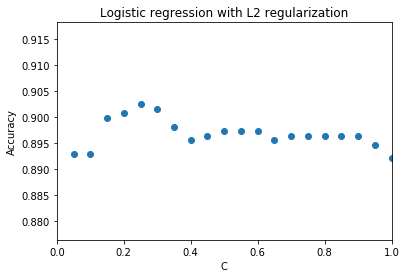

In [75]:
Accuracy = []
C = np.arange(.05, 1.05, .05)

for c in C:
    LR = LogisticRegression(C = c)
    LR.fit(X_train, y_train)
    p_valid = LR.predict(X_valid)
    Accuracy.append(accuracy_score(y_valid, p_valid))

plt.title("Logistic regression with L2 regularization")
plt.scatter(C, Accuracy)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xlim(0, max(C))
plt.show()

## Effect of L1 regularization:

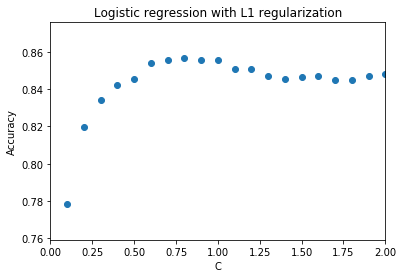

In [76]:
Accuracy = []
C = np.arange(.1, 2.1, .1)

for c in C:
    LR = LogisticRegression(C = c, penalty = 'l1')
    LR.fit(X_train, y_train)
    p_valid = LR.predict(X_valid)
    Accuracy.append(accuracy_score(y_valid, p_valid))

plt.title("Logistic regression with L1 regularization")
plt.scatter(C, Accuracy)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xlim(0, max(C))
plt.show()

## Decision boundry for binary logistic regression:

In [21]:
cats = ['sci.space', 'talk.politics.mideast']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, remove=('headers', 'footers', 'quotes'), shuffle = False)
train_data = newsgroups_train.data
y_train = newsgroups_train.target

newsgroups_valid = fetch_20newsgroups(subset='test', categories=cats, remove=('headers', 'footers', 'quotes'), shuffle = False)
valid_data = newsgroups_valid.data
y_valid = newsgroups_valid.target


Train a binary logistic regression:

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


count = CountVectorizer(min_df = 5, stop_words = 'english', binary = False)
X_train = count.fit_transform(train_data)
X_valid = count.transform(valid_data)

LR = LogisticRegression(C = .1)
LR.fit(X_train, y_train)
#p_valid = LR.predict(X_valid)
p_valid_prob = LR.predict_proba(X_valid)
p_valid = (p_valid_prob[:, 1] > .5).astype('i4')
print(classification_report(y_valid, p_valid))
X_train.shape

             precision    recall  f1-score   support

          0       0.90      0.98      0.94       394
          1       0.98      0.88      0.93       376

avg / total       0.94      0.93      0.93       770



(1157, 4624)

Reduce dimension and create the grid:

In [86]:
from  sklearn.decomposition import PCA
#Reduce dimension
pca = PCA(2)
X_train_2d = pca.fit_transform(X_train.toarray())

xx, yy = np.mgrid[-5:5:.1, -5:5:.1]
grid = np.c_[xx.ravel(), yy.ravel()]
inverse_grid = pca.inverse_transform(grid)
probs = LR.predict_proba(inverse_grid)[:, 1].reshape(xx.shape)


Plot the decision boundry:

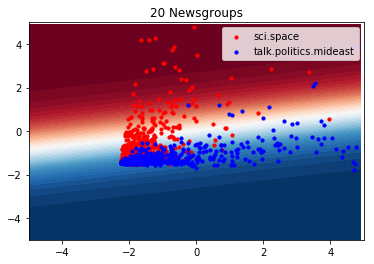

In [87]:
contour = plt.contourf(xx, yy, probs, 50, cmap="RdBu", vmin=0, vmax=1)

colors = 'rb'
for i in range(len(newsgroups_train.target_names)):
    target = newsgroups_train.target == i
    plt.scatter(X_train_2d[target, 0], X_train_2d[target, 1], 10, c = colors[i], label = newsgroups_train.target_names[i])

plt.title('20 Newsgroups')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.legend(loc = 'upper right')
plt.show()

## Decision boundry for multi-class logistic regression:

In [88]:
cats = ['sci.space', 'talk.politics.mideast', 'comp.sys.mac.hardware']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, remove=('headers', 'footers', 'quotes'), shuffle = False)
train_data = newsgroups_train.data
y_train = newsgroups_train.target

newsgroups_valid = fetch_20newsgroups(subset='test', categories=cats, remove=('headers', 'footers', 'quotes'), shuffle = False)
valid_data = newsgroups_valid.data
y_valid = newsgroups_valid.target


Train logistic regression:

In [93]:
count = CountVectorizer(min_df = 3, stop_words = 'english',binary = False)
X_train = count.fit_transform(train_data)
X_valid = count.transform(valid_data)

LR = LogisticRegression(C = .05)
LR.fit(X_train, y_train)
p_valid = LR.predict(X_valid)
print(accuracy_score(y_valid, p_valid))

0.897835497835


Reduce dimension:

In [94]:
from  sklearn.decomposition import PCA
#Reduce dimension
pca = PCA(2)
X_train_2d = pca.fit_transform(X_train.toarray())

Draw decision boundries:

In [99]:
xx, yy = np.mgrid[-2:5:.05, -4:5:.05]
grid = np.c_[xx.ravel(), yy.ravel()]

grid

array([[-2.  , -4.  ],
       [-2.  , -3.95],
       [-2.  , -3.9 ],
       ..., 
       [ 4.95,  4.85],
       [ 4.95,  4.9 ],
       [ 4.95,  4.95]])

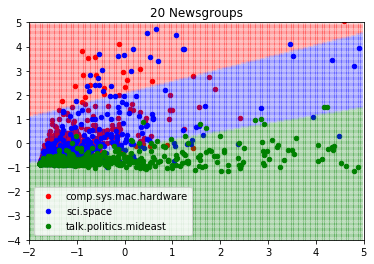

In [95]:
xx, yy = np.mgrid[-2:5:.05, -4:5:.05]
grid = np.c_[xx.ravel(), yy.ravel()]
inverse_grid = pca.inverse_transform(grid)
pred = LR.predict(inverse_grid).reshape(xx.shape)

colors = 'rbg'
for i in range(len(newsgroups_train.target_names)):
    plt.scatter(xx[pred == i], yy[pred == i], 5, colors[i], alpha =.1, marker = 's')
    target = newsgroups_train.target == i
    plt.scatter(X_train_2d[target, 0], X_train_2d[target, 1], 20, c = colors[i], label = newsgroups_train.target_names[i])

plt.title('20 Newsgroups')
plt.xlim(-2, 5)
plt.ylim(-4, 5)
plt.legend(loc = 'lower left')
plt.show()